In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
inbound_df = pd.read_csv("../Data/Inbound.csv")
inventory_df = pd.read_csv("../Data/Inventory.csv")
material_master_df = pd.read_csv("../Data/MaterialMaster.csv")
outbound_df = pd.read_csv("../Data/Outbound.csv")
operations_df = pd.read_csv("../Data/OperationCost.csv")

In [3]:
inventory_df = inventory_df.dropna()
outbound_df = outbound_df.dropna()

avg_cost_per_kg_singapore = pd.read_csv("../Data/average_cost_per_kg_singapore.csv")
avg_cost_per_kg_singapore.rename(columns={
    'AVG_COST_PER_KG_x': 'AVG_COST_PER_KG'
}, inplace=True)

avg_cost_per_kg_singapore

# convert AVG_COST_PER_KG to AVG_COST_PER_MT
avg_cost_per_kg_singapore['AVG_COST_PER_MT'] = avg_cost_per_kg_singapore['AVG_COST_PER_KG'] * 1000

avg_cost_per_kg_singapore.drop(columns=['AVG_COST_PER_KG'], inplace=True)

avg_cost_per_MT_singapore = avg_cost_per_kg_singapore


avg_cost_per_MT_singapore["MATERIAL_NAME"] = "MAT-0193"

In [4]:
avg_cost_per_kg_singapore = pd.read_csv("../Data/average_cost_per_kg_singapore.csv")
avg_cost_per_kg_singapore.rename(columns={
    'AVG_COST_PER_KG_x': 'AVG_COST_PER_KG'
}, inplace=True)

avg_cost_per_kg_singapore

# convert AVG_COST_PER_KG to AVG_COST_PER_MT
avg_cost_per_kg_singapore['AVG_COST_PER_MT'] = avg_cost_per_kg_singapore['AVG_COST_PER_KG'] * 1000

avg_cost_per_kg_singapore.drop(columns=['AVG_COST_PER_KG'], inplace=True)

avg_cost_per_MT_singapore = avg_cost_per_kg_singapore

In [5]:
avg_cost_per_MT_singapore

,MATERIAL_NAME,AVG_COST_PER_KG_USD,AVG_COST_PER_MT
0,MAT-0005,1.168123,1478.636364
1,MAT-0007,0.453199,573.670153
2,MAT-0011,0.442400,560.000000
3,MAT-0012,0.564063,714.004200
4,MAT-0014,0.447071,565.912799
...,...,...,...
262,MAT-0426,1.215164,1538.181818
263,MAT-0427,1.208700,1530.000000
264,MAT-0428,0.824656,1043.868962
265,MAT-0431,1.698297,2149.743590


# Preparing the Inventory DF

Change all currency to USD and then remove the currency column

In [6]:
fx_rates = {'SGD': 0.74, 'CNY': 0.14, 'USD': 1.00}
# 1) Copy your original
inventory_usd = inventory_df.copy()

# 2) Clean and convert on the copy
inventory_usd['STOCK_SELL_VALUE'] = (
    inventory_usd['STOCK_SELL_VALUE']
      .replace(r'[^\d\.]', '', regex=True)
      .astype(float)
)
inventory_usd['STOCK_SELL_USD'] = (
    inventory_usd['STOCK_SELL_VALUE']
    * inventory_usd['CURRENCY'].map(fx_rates)
)

inventory_usd.drop(columns=['CURRENCY', 'STOCK_SELL_VALUE'], inplace=True)
inventory_usd

# rename columns UNRESRICTED_STOCK to UNRESTRICTED_STOCK
inventory_usd.rename(columns={'UNRESRICTED_STOCK': 'UNRESTRICTED_STOCK'}, inplace=True)

inventory_usd["PLANT_NAME"].unique()

inventory_usd

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESTRICTED_STOCK,STOCK_UNIT,STOCK_SELL_USD
0,12/31/2023,CHINA-WAREHOUSE,MAT-0045,SCRAP,164,KG,29.54
1,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6024,0,KG,12273.24
2,12/31/2023,CHINA-WAREHOUSE,MAT-0193,5755,70720,KG,58018.66
3,12/31/2023,CHINA-WAREHOUSE,MAT-0193,3142,12240,KG,10041.64
4,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6734,2720,KG,2231.46
...,...,...,...,...,...,...,...
28323,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0172,M2299A,74250,KG,15384.60
28324,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0172,M3493A,15125,KG,3133.90
28325,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0191,K1286,325,KG,456950.00
28326,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0191,K8761,3000,KG,4218000.00


/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_62628/3631320998.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  materials_in_inventory_not_in_avg_cost_df['AVG_COST_PER_MT'] = (
/Users/deedee/Downloads/BootcampPackage - EM Bootcathon 2025/em_bootcathon_2025/.venv/lib/python3.13/site-packages/matplotlib/transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


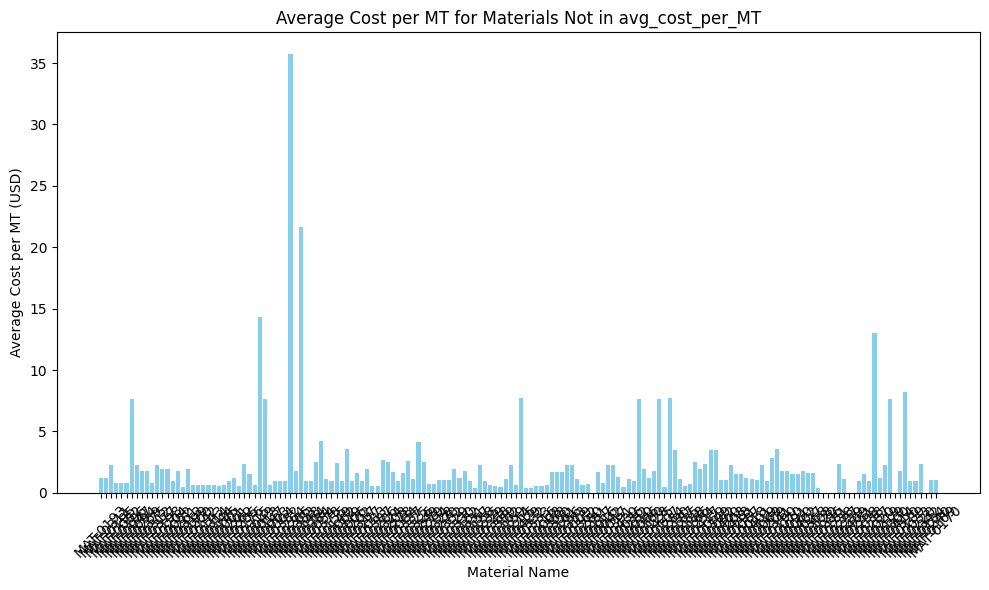

In [7]:
# I want every material in inventory_usd except for the one in the avg_cost_per_MT dataframe
materials_in_inventory = inventory_usd['MATERIAL_NAME'].unique()
materials_in_inventory_not_in_avg_cost = [
    m for m in materials_in_inventory if m not in avg_cost_per_MT_singapore['MATERIAL_NAME'].unique()
]
# print("Materials in inventory_usd not in avg_cost_per_MT:", materials_in_inventory_not_in_avg_cost)

# I want to see the materials in materials_in_inventory_not_in_avg_cost in inventory_usd
materials_in_inventory_not_in_avg_cost_df = inventory_usd[inventory_usd['MATERIAL_NAME'].isin(materials_in_inventory_not_in_avg_cost)]
materials_in_inventory_not_in_avg_cost_df

#for every row in materials_in_inventory_not_in_avg_cost_df, just do unrestricted stock / stock_sell_usd
materials_in_inventory_not_in_avg_cost_df['AVG_COST_PER_MT'] = (
    materials_in_inventory_not_in_avg_cost_df['UNRESTRICTED_STOCK']
    / materials_in_inventory_not_in_avg_cost_df['STOCK_SELL_USD']
)
materials_in_inventory_not_in_avg_cost_df = materials_in_inventory_not_in_avg_cost_df[['MATERIAL_NAME', 'AVG_COST_PER_MT']]

materials_in_inventory_not_in_avg_cost_df

# can you plot the graph for materials in materials_in_inventory_not_in_avg_cost_df?
plt.figure(figsize=(10, 6))
plt.bar(materials_in_inventory_not_in_avg_cost_df['MATERIAL_NAME'], materials_in_inventory_not_in_avg_cost_df['AVG_COST_PER_MT'], color='skyblue')
plt.xlabel('Material Name')
plt.ylabel('Average Cost per MT (USD)')
plt.title('Average Cost per MT for Materials Not in avg_cost_per_MT')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()







In [8]:
inventory_cleaned_usd = inventory_usd[
    inventory_usd['BATCH_NUMBER'] != 'SCRAP'
].copy()

inventory_scrap_usd = inventory_usd[
    inventory_usd['BATCH_NUMBER'] == 'SCRAP'
].copy()

inventory_scrap_usd["PLANT_NAME"].unique()
inventory_cleaned_usd.reset_index(drop=True, inplace=True)
inventory_cleaned_usd.head()

inventory_scrap_usd.reset_index(drop=True, inplace=True)
inventory_scrap_usd.head()

print("Checking null values in cleaned Inventory DataFrame:")

print("----------------------------")
inventory_cleaned_usd = inventory_cleaned_usd.dropna(
    subset=['BATCH_NUMBER']
).reset_index(drop=True)

inventory_scrap_usd = inventory_scrap_usd.dropna(
    subset=['BATCH_NUMBER']
).reset_index(drop=True)

# inventory_cleaned_usd.head()
inventory_scrap_usd

Checking null values in cleaned Inventory DataFrame:
----------------------------


,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESTRICTED_STOCK,STOCK_UNIT,STOCK_SELL_USD
0,12/31/2023,CHINA-WAREHOUSE,MAT-0045,SCRAP,164,KG,29.54
1,12/31/2023,CHINA-WAREHOUSE,MAT-0311,SCRAP,4142,KG,3502.52
2,12/31/2023,CHINA-WAREHOUSE,MAT-0194,SCRAP,100,KG,43.96
3,12/31/2023,CHINA-WAREHOUSE,MAT-0257,SCRAP,5151,KG,1463.98
4,12/31/2023,CHINA-WAREHOUSE,MAT-0258,SCRAP,10048,KG,8243.06
...,...,...,...,...,...,...,...
257,12/31/2024,CHINA-WAREHOUSE,MAT-0187,SCRAP,544,KG,70.84
258,12/31/2024,CHINA-WAREHOUSE,MAT-0214,SCRAP,535,KG,481.46
259,12/31/2024,CHINA-WAREHOUSE,MAT-0300,SCRAP,1300,KG,571.48
260,12/31/2024,CHINA-WAREHOUSE,MAT-0280,SCRAP,11,KG,10.08


In [9]:
# can you remove all rows where UNRESTRICTED_STOCK is 0?
inventory_cleaned_usd = inventory_cleaned_usd[
    inventory_cleaned_usd['UNRESTRICTED_STOCK'] > 0
].reset_index(drop=True)
print("Checking null values in cleaned Inventory DataFrame after removing rows with UNRESTRICTED_STOCK = 0:", inventory_cleaned_usd.isnull().sum())

inventory_scrap_usd = inventory_scrap_usd[
    inventory_scrap_usd['UNRESTRICTED_STOCK'] > 0
].reset_index(drop=True)
print("Checking null values in cleaned Inventory Scrap DataFrame after removing rows with UNRESTRICTED_STOCK = 0:", inventory_scrap_usd.isnull().sum())



Checking null values in cleaned Inventory DataFrame after removing rows with UNRESTRICTED_STOCK = 0: BALANCE_AS_OF_DATE    0
PLANT_NAME            0
MATERIAL_NAME         0
BATCH_NUMBER          0
UNRESTRICTED_STOCK    0
STOCK_UNIT            0
STOCK_SELL_USD        0
dtype: int64
Checking null values in cleaned Inventory Scrap DataFrame after removing rows with UNRESTRICTED_STOCK = 0: BALANCE_AS_OF_DATE    0
PLANT_NAME            0
MATERIAL_NAME         0
BATCH_NUMBER          0
UNRESTRICTED_STOCK    0
STOCK_UNIT            0
STOCK_SELL_USD        0
dtype: int64


In [10]:
inventory_scrap_usd["PLANT_NAME"].unique()

array(['CHINA-WAREHOUSE'], dtype=object)

# Get average price per MT of each Material

In [11]:
# i want to get every material in china except for the one in the avg_cost_per_MT dataframe
materials_in_china = inventory_scrap_usd[inventory_scrap_usd['PLANT_NAME'] == 'CHINA']['MATERIAL_NAME'].unique()
materials_in_china_not_in_avg_cost = [
    m for m in materials_in_china if m not in avg_cost_per_MT['MATERIAL_NAME'].unique()
]   
print("Materials in China not in avg_cost_per_MT:", materials_in_china_not_in_avg_cost)


Materials in China not in avg_cost_per_MT: []


In [12]:
# can you calculate the value of each material per kg in the cleaned inventory DataFrame?
inventory_cleaned_usd['VALUE_PER_KG'] = (
    inventory_cleaned_usd['STOCK_SELL_USD'] / inventory_cleaned_usd['UNRESTRICTED_STOCK']
)
# I only want to get all rows where PLANT_NAME is 'SINGAPORE-WAREHOUSE'
inventory_cleaned_usd = inventory_cleaned_usd[inventory_cleaned_usd['PLANT_NAME'] == 'SINGAPORE-WAREHOUSE']


#convert the BALANCE_AS_OF_DATE column to datetime
inventory_cleaned_usd['BALANCE_AS_OF_DATE'] = pd.to_datetime(inventory_cleaned_usd['BALANCE_AS_OF_DATE'], errors='coerce')


# I only want to keep the BALANCE_AS_OF_DATE row that is on the latest date in 2023-12-31
latest_date = pd.to_datetime("2023-12-31")
inventory_cleaned_usd = inventory_cleaned_usd[inventory_cleaned_usd['BALANCE_AS_OF_DATE'] <= latest_date]

lastest_date = pd.to_datetime("2023-12-31")
inventory_scrap_usd['BALANCE_AS_OF_DATE'] = pd.to_datetime(inventory_scrap_usd['BALANCE_AS_OF_DATE'], errors='coerce')

#now i want to aggregate the data by MATERIAL_NAME and sum the UNRESRICTED_STOCK 
inventory_aggregated = inventory_cleaned_usd.groupby('MATERIAL_NAME', as_index=False).agg({
    'UNRESTRICTED_STOCK': 'sum',
})

# can you calculate the value of each material per kg in the cleaned inventory DataFrame?
inventory_scrap_usd['VALUE_PER_KG'] = (
    inventory_scrap_usd['STOCK_SELL_USD'] / inventory_scrap_usd['UNRESTRICTED_STOCK']
)
# I only want to get all rows where PLANT_NAME is 'SINGAPORE-WAREHOUSE'
inventory_scrap_usd = inventory_scrap_usd[inventory_scrap_usd['PLANT_NAME'] == 'SINGAPORE-WAREHOUSE']


#convert the BALANCE_AS_OF_DATE column to datetime
inventory_scrap_usd['BALANCE_AS_OF_DATE'] = pd.to_datetime(inventory_scrap_usd['BALANCE_AS_OF_DATE'], errors='coerce')


# I only want to keep the BALANCE_AS_OF_DATE row that is on the latest date in 2023-12-31
latest_date = pd.to_datetime("2023-12-31")
inventory_scrap_usd = inventory_scrap_usd[inventory_scrap_usd['BALANCE_AS_OF_DATE'] <= latest_date]

# now i want to aggregate the data by MATERIAL_NAME and sum the UNRESRICTED_STOCK 
inventory_aggregated = inventory_cleaned_usd.groupby('MATERIAL_NAME', as_index=False).agg({
    'UNRESTRICTED_STOCK': 'sum',
})

inventory_scrap_aggregated = inventory_scrap_usd.groupby('MATERIAL_NAME', as_index=False).agg({
    'UNRESTRICTED_STOCK': 'sum',
})



inventory_aggregated
# inventory_scrap_usd

,MATERIAL_NAME,UNRESTRICTED_STOCK
0,MAT-0005,15000
1,MAT-0007,13400
2,MAT-0015,1007500
3,MAT-0022,6875
4,MAT-0028,19250
...,...,...
146,MAT-0420,4075
147,MAT-0421,672925
148,MAT-0422,4100
149,MAT-0423,23375


In [13]:
# I want to merge the inventory_aggregated DataFrame with the SHELF_LIFE_IN_MONTH and DOWNGRADE_VALUE_LOST_PERCENT from material_master_df and also merge the Value_USD_per_MT from avg_cost_per_MT DataFrame 
inventory_aggregated = inventory_aggregated.merge(
    material_master_df[['MATERIAL_NAME', 'SHELF_LIFE_IN_MONTH', 'DOWNGRADE_VALUE_LOST_PERCENT']],
    on='MATERIAL_NAME',
    how='left'
)


inventory_aggregated = inventory_aggregated.merge(
    avg_cost_per_MT_singapore[['MATERIAL_NAME', 'AVG_COST_PER_MT']],
    on='MATERIAL_NAME',
    how='left'  
)   

inventory_aggregated

inventory_aggregated.rename(columns={'AVG_COST_PER_MT': 'Value_USD_per_MT'}, inplace=True)
inventory_aggregated.head() 



inventory_aggregated["UNRESTRICTED_STOCK"] = inventory_aggregated["UNRESTRICTED_STOCK"]/1000

In [14]:
best_transport = pd.read_csv("../Data/best_tranportation.csv")
best_transport

# merge the inventory_aggregaedtion DataFrame with the best_transport DataFrame using the 'MATERIAL_NAME' column
inventory_aggregated = inventory_aggregated.merge(
    best_transport[['MATERIAL_NAME', 'TRANSPORTATION_MODES']],
    on='MATERIAL_NAME',
    how='left'
)   

inventory_aggregated



,MATERIAL_NAME,UNRESTRICTED_STOCK,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT,Value_USD_per_MT,TRANSPORTATION_MODES
0,MAT-0005,15.000,5,20,1478.636364,Marine
1,MAT-0007,13.400,2,10,573.670153,Marine
2,MAT-0015,1007.500,8,20,7462.090896,Marine
3,MAT-0022,6.875,8,30,411.449351,NaN
4,MAT-0028,19.250,10,45,519.310404,Truck
...,...,...,...,...,...,...
146,MAT-0420,4.075,5,15,522.515337,Marine
147,MAT-0421,672.925,8,15,605.282560,Marine
148,MAT-0422,4.100,7,50,475.000000,NaN
149,MAT-0423,23.375,8,5,470.539857,Marine


In [15]:
# inventory_aggregated drop all rows where TRANSPORTATION_MODES is null
inventory_aggregated = inventory_aggregated[inventory_aggregated['TRANSPORTATION_MODES'].notnull()].reset_index(drop=True)  

In [16]:
inventory_aggregated

,MATERIAL_NAME,UNRESTRICTED_STOCK,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT,Value_USD_per_MT,TRANSPORTATION_MODES
0,MAT-0005,15.000,5,20,1478.636364,Marine
1,MAT-0007,13.400,2,10,573.670153,Marine
2,MAT-0015,1007.500,8,20,7462.090896,Marine
3,MAT-0028,19.250,10,45,519.310404,Truck
4,MAT-0029,15.800,3,20,521.604938,Marine
...,...,...,...,...,...,...
135,MAT-0419,198.000,3,15,2099.086109,Marine
136,MAT-0420,4.075,5,15,522.515337,Marine
137,MAT-0421,672.925,8,15,605.282560,Marine
138,MAT-0423,23.375,8,5,470.539857,Marine


# Prepareing Forcast DF

In [17]:
forcast = pd.read_csv("../Data/Monthly_Forecast_Summary.csv")


In [18]:
forecast_sg = forcast[forcast['Warehouse'] == 'SINGAPORE'].copy()
forcast

,Warehouse,Month,Total_Cap_KT,Predicted_Outbound_KT,Predicted_Inventory_KT
0,SINGAPORE,2024-01,53.5,8.71,39.58100
1,SINGAPORE,2024-02,53.5,10.95,36.76300
2,SINGAPORE,2024-03,53.5,9.36,35.04900
3,SINGAPORE,2024-04,53.5,7.52,35.66300
4,SINGAPORE,2024-05,53.5,10.74,36.37400
5,SINGAPORE,2024-06,53.5,9.44,40.50000
6,SINGAPORE,2024-07,53.5,11.38,44.28800
7,SINGAPORE,2024-08,53.5,11.33,41.76900
8,SINGAPORE,2024-09,53.5,16.70,41.73500
9,SINGAPORE,2024-10,53.5,20.98,41.84900


In [19]:
# multiply the three KT‐columns by 1 000:
forecast_sg["Total_Cap_MT"] = forecast_sg["Total_Cap_KT"] * 1000
forecast_sg["Predicted_Outbound_MT"] = forecast_sg["Predicted_Outbound_KT"] * 1000
forecast_sg["Predicted_Inventory_MT"] = forecast_sg["Predicted_Inventory_KT"] * 1000

# if you’d rather *replace* the old columns in place and rename:
forecast_sg["Total_Cap_KT"] *= 1000
forecast_sg.drop(columns=['Total_Cap_KT', 'Predicted_Outbound_KT', 'Predicted_Inventory_KT'], inplace=True)

forecast_sg['Month'] = pd.to_datetime(forecast_sg['Month']).dt.to_period('M')



In [20]:
forecast_sg


,Warehouse,Month,Total_Cap_MT,Predicted_Outbound_MT,Predicted_Inventory_MT
0,SINGAPORE,2024-01,53500.0,8710.0,39581.00
1,SINGAPORE,2024-02,53500.0,10950.0,36763.00
2,SINGAPORE,2024-03,53500.0,9360.0,35049.00
3,SINGAPORE,2024-04,53500.0,7520.0,35663.00
4,SINGAPORE,2024-05,53500.0,10740.0,36374.00
5,SINGAPORE,2024-06,53500.0,9440.0,40500.00
6,SINGAPORE,2024-07,53500.0,11380.0,44288.00
7,SINGAPORE,2024-08,53500.0,11330.0,41769.00
8,SINGAPORE,2024-09,53500.0,16700.0,41735.00
9,SINGAPORE,2024-10,53500.0,20980.0,41849.00


# Prepareing Operations Df

In [21]:
operations_df = operations_df[
	~((operations_df["Operation"] == "Inventory Storage per MT per day") & 
	  (operations_df["Plant/Mode of Transport"] == "CHINA WAREHOUSE"))
]
operations_df

,Operation,Plant/Mode of Transport,Cost,Currency
0,Inventory Storage per MT per day,SINGAPORE WAREHOUSE,15.0,SGD
2,Transfer cost per container (24.75MT),Truck,150.0,SGD
3,Transfer cost per container (24.75MT),Marine,75.0,USD


In [22]:
operations_df["Cost_USD"] = operations_df["Cost"] * operations_df["Currency"].map(fx_rates)

In [23]:
operations_df.drop(columns=['Cost'], inplace=True)
operations_df.drop(columns=['Currency'], inplace=True)
operations_df

,Operation,Plant/Mode of Transport,Cost_USD
0,Inventory Storage per MT per day,SINGAPORE WAREHOUSE,11.1
2,Transfer cost per container (24.75MT),Truck,111.0
3,Transfer cost per container (24.75MT),Marine,75.0


# Preparing Inbound 2024 for Singapore

In [24]:
# 2) Prepare inbound events
sg_inb = (
    inbound_df[inbound_df['PLANT_NAME']=='SINGAPORE-WAREHOUSE']
    .assign(
        INBOUND_DATE=lambda df: pd.to_datetime(
            df['INBOUND_DATE'], format='%Y/%m/%d', errors='coerce'
        )
    )
    .sort_values(['MATERIAL_NAME','INBOUND_DATE'])
)

sg_inb.head()

sg_inb_daily = (
    sg_inb
    .groupby(['INBOUND_DATE','MATERIAL_NAME'], as_index=False)
    .agg(InboundQty_MT=('NET_QUANTITY_MT','sum'))
    .sort_values(['INBOUND_DATE','MATERIAL_NAME'])
)

# ensure INBOUND_DATE is datetime
sg_inb_daily['INBOUND_DATE'] = pd.to_datetime(
    sg_inb_daily['INBOUND_DATE'], errors='coerce'
)

# filter to year 2024, keep daily granularity
sg_inb_daily_2024 = sg_inb_daily[
    sg_inb_daily['INBOUND_DATE'].dt.year == 2024
].copy()

In [25]:
# 1) make sure date is datetime
sg_inb_daily['INBOUND_DATE'] = pd.to_datetime(sg_inb_daily['INBOUND_DATE'])

# 2) extract month period
sg_inb_daily['month'] = sg_inb_daily['INBOUND_DATE'].dt.to_period('M')

# 3) aggregate into monthly totals
sg_inb_monthly = (
    sg_inb_daily
      .groupby(['month','MATERIAL_NAME'], as_index=False)
      .agg(MonthlyInbound_MT=('InboundQty_MT','sum'))
      .sort_values(['month','MATERIAL_NAME'])
)

sg_inb_monthly.head()

,month,MATERIAL_NAME,MonthlyInbound_MT
0,2023-11,MAT-0062,173.250
1,2023-11,MAT-0068,24.750
2,2023-11,MAT-0085,72.875
3,2023-11,MAT-0112,247.500
4,2023-11,MAT-0116,46.750


In [26]:
# Merge with SHELF_LIFE_IN_MONTH from material_master_df
sg_inb_monthly = sg_inb_monthly.merge(
    material_master_df[['MATERIAL_NAME', 'SHELF_LIFE_IN_MONTH', 'DOWNGRADE_VALUE_LOST_PERCENT']],
    on='MATERIAL_NAME',
    how='left'
)


# drop anything not in 2024
inb_2024 = sg_inb_monthly[sg_inb_monthly['month'].dt.year == 2024]

# build your inbound lookup
inb_dict = (
    inb_2024
    .set_index(['month','MATERIAL_NAME'])['MonthlyInbound_MT']
    .to_dict()
)

In [27]:
inb_2024

,month,MATERIAL_NAME,MonthlyInbound_MT,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT
55,2024-01,MAT-0037,24.75,3,15
56,2024-01,MAT-0056,618.75,3,5
57,2024-01,MAT-0065,123.75,4,25
58,2024-01,MAT-0067,24.75,8,20
59,2024-01,MAT-0068,123.75,6,20
...,...,...,...,...,...
439,2024-11,MAT-0390,445.50,7,30
440,2024-11,MAT-0413,148.50,7,20
441,2024-12,MAT-0247,247.50,6,20
442,2024-12,MAT-0302,247.50,4,20


In [28]:
# Merge the inb_2024 DataFrame with the best_transport DataFrame using the 'MATERIAL_NAME' column
inb_2024 = inb_2024.merge(
    best_transport[['MATERIAL_NAME', 'TRANSPORTATION_MODES']],
    on='MATERIAL_NAME',
    how='left'

)

# Merge the inb_2024 DataFrame with the avg_cost_per_MT DataFrame using the 'MATERIAL_NAME' column
inb_2024 = inb_2024.merge(
    avg_cost_per_MT_singapore[['MATERIAL_NAME', 'AVG_COST_PER_MT']],
    on='MATERIAL_NAME',
    how='left'
)

inb_2024.loc[inb_2024['MATERIAL_NAME'] == 'MAT-0060', 'AVG_COST_PER_MT'] = 560

inb_2024.rename(columns={'AVG_COST_PER_MT': 'Value_USD_per_MT'}, inplace=True)
inb_2024.head()

,month,MATERIAL_NAME,MonthlyInbound_MT,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT,TRANSPORTATION_MODES,Value_USD_per_MT
0,2024-01,MAT-0037,24.75,3,15,Marine,504.436510
1,2024-01,MAT-0056,618.75,3,5,Marine,753.637567
2,2024-01,MAT-0065,123.75,4,25,Marine,645.703293
3,2024-01,MAT-0067,24.75,8,20,NaN,402.732782
4,2024-01,MAT-0068,123.75,6,20,Marine,405.684993


In [29]:
inb_2024.isnull().sum()

# drop all rows where TRANSPORTATION_MODES is null
inb_2024 = inb_2024[inb_2024['TRANSPORTATION_MODES'].notnull()].reset_index(drop=True)

In [30]:
# rename the 'AVG_COST_PER_MT' column to 'Value_Cost_USD_per_MT'
inb_2024.rename(columns={'Value_Cost_USD_per_MT': 'Value_USD_per_MT'}, inplace=True)
inb_2024.head()

,month,MATERIAL_NAME,MonthlyInbound_MT,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT,TRANSPORTATION_MODES,Value_USD_per_MT
0,2024-01,MAT-0037,24.75,3,15,Marine,504.436510
1,2024-01,MAT-0056,618.75,3,5,Marine,753.637567
2,2024-01,MAT-0065,123.75,4,25,Marine,645.703293
3,2024-01,MAT-0068,123.75,6,20,Marine,405.684993
4,2024-01,MAT-0089,24.75,4,5,Marine,559.500875


In [31]:
import pandas as pd
import pulp
import calendar

# ——— 0. LOAD INPUT DATA ———
# Adjust file paths as needed


# b) operation & holding cost
ops     = operations_df.set_index('Plant/Mode of Transport')['Cost_USD'].to_dict()
h_daily = ops.get('SINGAPORE WAREHOUSE', 0)

# c) transport cost per MT by mode
container_size    = 24.75
trans_cost_per_mt = {mode: ops.get(mode, 0) / container_size
                     for mode in ['Truck','Marine']}

# d) calendar & index sets
months        = sorted(forecast_sg['Month'].unique())
days_in_month = {m: calendar.monthrange(m.year, m.month)[1] for m in months}
M             = inventory_aggregated['MATERIAL_NAME'].unique().tolist()

# e) SKU-specific parameters
inv_init    = inventory_aggregated.set_index('MATERIAL_NAME')['UNRESTRICTED_STOCK'].to_dict()
shelf_life  = inventory_aggregated.set_index('MATERIAL_NAME')['SHELF_LIFE_IN_MONTH'].to_dict()
spoil_pct   = (inventory_aggregated.set_index('MATERIAL_NAME')['DOWNGRADE_VALUE_LOST_PERCENT'] / 100).to_dict()
value_usd   = inventory_aggregated.set_index('MATERIAL_NAME')['Value_USD_per_MT'].to_dict()
mode_allowed= inventory_aggregated.set_index('MATERIAL_NAME')['TRANSPORTATION_MODES'].to_dict()

# map each SKU to its per-MT transport cost (fixed)
sku_trans_cost = {m: trans_cost_per_mt[mode_allowed[m]] for m in M}

# f) inbound, demand & capacity lookups
demand   = forecast_sg.set_index('Month')['Predicted_Outbound_MT'].to_dict()
capacity = forecast_sg.set_index('Month')['Predicted_Inventory_MT'].to_dict()
inb_lkup = inb_2024.set_index(['month','MATERIAL_NAME'])['MonthlyInbound_MT'].to_dict()

# ——— 2. BUILD LP ———
prob = pulp.LpProblem("SG_Warehouse", pulp.LpMinimize)

# 2a) decision variables: collapsed per-SKU/month
Yf = {(m,t): pulp.LpVariable(f"ShipFresh_{m}_{t}", lowBound=0) for m in M for t in months}
Yd = {(m,t): pulp.LpVariable(f"ShipDegr_{m}_{t}", lowBound=0) for m in M for t in months}
If = {(m,t): pulp.LpVariable(f"InvFresh_{m}_{t}", lowBound=0) for m in M for t in months}
Id = {(m,t): pulp.LpVariable(f"InvDegr_{m}_{t}", lowBound=0) for m in M for t in months}
Z  = {(m,t): pulp.LpVariable(f"Degrade_{m}_{t}", lowBound=0) for m in M for t in months}

# 2b) inventory balance
for m in M:
    for i, t in enumerate(months):
        prev_f = inv_init[m] if i == 0 else If[m, months[i-1]]
        prev_d = 0        if i == 0 else Id[m, months[i-1]]
        inb    = inb_lkup.get((t,m), 0)

        prob += prev_f + inb - Yf[m,t] - Z[m,t] == If[m,t], f"BalFresh_{m}_{t}"
        prob += prev_d + Z[m,t] - Yd[m,t] == Id[m,t], f"BalDegr_{m}_{t}"

# 2c) spoilage: no early, at most available aged fresh
for m in M:
    s = int(shelf_life[m])
    for i, t in enumerate(months):
        if i < s:
            prob += Z[m,t] == 0, f"NoSpoil_{m}_{t}"
        else:
            old_t = months[i - s]
            prob += Z[m,t] <= If[m,old_t], f"LimitSpoil_{m}_{t}"

# 2d) demand & utilization
for t in months:
    # satisfy demand exactly
    prob += pulp.lpSum(Yf[m,t] + Yd[m,t] for m in M) == demand[t], f"Demand_{t}"

    # keep inventory between 75%–85% of capacity
    total_inv = pulp.lpSum(If[m,t] + Id[m,t] for m in M)
    prob += total_inv >= 0.75 * capacity[t], f"MinInv_{t}"
    prob += total_inv <= 0.85 * capacity[t], f"MaxInv_{t}"

# 2e) objective: holding + transport + spoilage costs
prob += (
    # holding cost
    pulp.lpSum((If[m,t] + Id[m,t]) * h_daily * days_in_month[t]
               for m in M for t in months)
    # transport cost
  + pulp.lpSum((Yf[m,t] + Yd[m,t]) * sku_trans_cost[m] for m in M for t in months)
    # spoilage cost
  + pulp.lpSum(Z[m,t] * spoil_pct[m] * value_usd[m] for m in M for t in months)
), "Total_Cost"

# ——— 3. SOLVE & SUMMARY ———
prob.solve(pulp.PULP_CBC_CMD(msg=False))

rows = []
for t in months:
    ship_truck = sum((Yf[m,t].value() + Yd[m,t].value())
                     for m in M if mode_allowed[m] == 'Truck')
    ship_marine= sum((Yf[m,t].value() + Yd[m,t].value())
                     for m in M if mode_allowed[m] == 'Marine')
    inv_fresh  = sum(If[m,t].value() for m in M)
    inv_degr   = sum(Id[m,t].value() for m in M)

    rows.append({
        'Month':           t.to_timestamp(),
        'Ship_Truck_MT':   max(ship_truck, 0),
        'Ship_Marine_MT':  max(ship_marine, 0),
        'EndInvFresh':     max(inv_fresh, 0),
        'EndInvDegr':      max(inv_degr, 0)
    })

monthly_summary = pd.DataFrame(rows)
print(monthly_summary)
print("Total cost:", pulp.value(prob.objective))

        Month  Ship_Truck_MT  Ship_Marine_MT  EndInvFresh  EndInvDegr
0  2024-01-01            0.0          8710.0   30033.3000       0.000
1  2024-02-01            0.0         10950.0   27572.2500       0.000
2  2024-03-01            0.0          9360.0   29791.6500       0.000
3  2024-04-01            0.0          7520.0   32004.7750       0.000
4  2024-05-01            0.0         10740.0   29486.0250       0.000
5  2024-06-01            0.0          9440.0   25461.7000    4913.300
6  2024-07-01            0.0         11380.0   28302.7000    4913.300
7  2024-08-01            0.0         11330.0   33380.7500       0.000
8  2024-09-01            0.0         16700.0   28838.2790    2462.971
9  2024-10-01            0.0         20980.0   18277.0580   13109.692
10 2024-11-01            0.0         16470.0    7768.2790   22476.971
11 2024-12-01            0.0         13970.0    2422.0715   10646.721
Total cost: 119535078.40887111


In [32]:
# make transportation modes for all materials trucks
inb_2024['TRANSPORTATION_MODES'] = 'TRUCK'

In [33]:
import pandas as pd
import pulp
import calendar

# ——— 0. LOAD & FORMAT YOUR DATA ———
# inventory_aggregated:
#   ['MATERIAL_NAME','UNRESTRICTED_STOCK',
#    'SHELF_LIFE_IN_MONTH','DOWNGRADE_VALUE_LOST_PERCENT',
#    'TRANSPORTATION_MODES','Value_USD_per_MT']
# inb_2024:
#   ['month'(Period),'MATERIAL_NAME','MonthlyInbound_MT']
# forecast_sg:
#   ['Month'(Period),'Total_Cap_MT',
#    'Predicted_Outbound_MT','Predicted_Inventory_MT']
# operations_df:
#   ['Plant/Mode of Transport','Cost_USD']

# Ensure the date columns are Periods
if not pd.api.types.is_period_dtype(inb_2024['month']):
    inb_2024['month'] = pd.to_datetime(inb_2024['month']).dt.to_period('M')
if not pd.api.types.is_period_dtype(forecast_sg['Month']):
    forecast_sg['Month'] = pd.to_datetime(forecast_sg['Month']).dt.to_period('M')

# ——— 1. PARAMETERS & LOOKUPS ———

# a) Costs
ops     = operations_df.set_index('Plant/Mode of Transport')['Cost_USD'].to_dict()
h_daily = ops.get('SINGAPORE WAREHOUSE', 0)
container_size    = 24.75
trans_cost_per_mt = {mode: ops.get(mode,0)/container_size for mode in ['Truck','Marine']}

# b) Time & SKU list
months        = sorted(forecast_sg['Month'].unique())
days_in_month = {m: calendar.monthrange(m.year,m.month)[1] for m in months}
M             = inventory_aggregated['MATERIAL_NAME'].tolist()

# c) SKU attributes (all from inventory_aggregated)
inv_init     = inventory_aggregated.set_index('MATERIAL_NAME')['UNRESTRICTED_STOCK'].to_dict()
shelf_life   = inventory_aggregated.set_index('MATERIAL_NAME')['SHELF_LIFE_IN_MONTH'].astype(int).to_dict()
spoil_pct    = (inventory_aggregated.set_index('MATERIAL_NAME')['DOWNGRADE_VALUE_LOST_PERCENT']/100).to_dict()
mode_allowed = inventory_aggregated.set_index('MATERIAL_NAME')['TRANSPORTATION_MODES'].to_dict()
value_usd    = inventory_aggregated.set_index('MATERIAL_NAME')['Value_USD_per_MT'].to_dict()
# we also fix each SKU’s per-MT transport cost
sku_trans    = {m: trans_cost_per_mt[mode_allowed[m]] for m in M}

# d) Volume lookups
demand        = forecast_sg.set_index('Month')['Predicted_Outbound_MT'].to_dict()
capacity_hard = forecast_sg.set_index('Month')['Total_Cap_MT'].to_dict()
capacity_soft = forecast_sg.set_index('Month')['Predicted_Inventory_MT'].to_dict()
inb_lkup      = inb_2024.set_index(['month','MATERIAL_NAME'])['MonthlyInbound_MT'].to_dict()

# ——— 2. BUILD THE LP ———
prob = pulp.LpProblem("SG_With_InitialInv_from_Agg", pulp.LpMinimize)

# 2a) Decision variables
Yf = {(m,t): pulp.LpVariable(f"ShipFresh_{m}_{t}", lowBound=0) for m in M for t in months}
Yd = {(m,t): pulp.LpVariable(f"ShipDeg_{m}_{t}",   lowBound=0) for m in M for t in months}
If = {(m,t): pulp.LpVariable(f"InvFresh_{m}_{t}",  lowBound=0) for m in M for t in months}
Id = {(m,t): pulp.LpVariable(f"InvDeg_{m}_{t}",    lowBound=0) for m in M for t in months}
Z  = {(m,t): pulp.LpVariable(f"Deg_{m}_{t}",       lowBound=0) for m in M for t in months}

# ——— 3. MODE RESTRICTION ———
for m in M:
    allowed = mode_allowed[m]
    for t in months:
        if allowed == 'Truck':
            # no Marine shipments
            prob += Yf[m,t] * 0 + Yd[m,t] * 0 == (Yf[m,t] + Yd[m,t]), f"NoMarine_{m}_{t}"
        else:
            # no Truck shipments
            prob += Yf[m,t] * 0 + Yd[m,t] * 0 == (Yf[m,t] + Yd[m,t]), f"NoTruck_{m}_{t}"

# ——— 4. INVENTORY BALANCE & SPOILAGE ———
for m in M:
    for i, t in enumerate(months):
        prev_f = inv_init.get(m, 0.0) if i==0 else If[m, months[i-1]]
        prev_d = 0.0                    if i==0 else Id[m, months[i-1]]
        inb    = inb_lkup.get((t,m), 0.0)

        # Fresh balance
        prob += prev_f + inb - Yf[m,t] - Z[m,t] == If[m,t], f"BalFresh_{m}_{t}"
        # Degraded balance
        prob += prev_d + Z[m,t] - Yd[m,t] == Id[m,t], f"BalDeg_{m}_{t}"

        # Shelf-life enforcement
        if i < shelf_life[m]:
            prob += Z[m,t] == 0, f"NoSpoilEarly_{m}_{t}"
        else:
            old = months[i - shelf_life[m]]
            prob += Z[m,t] <= If[m,old], f"LimitSpoil_{m}_{t}"

# ——— 5. DEMAND & CAPACITY CONSTRAINTS ———
for t in months:
    # ship exactly demand (or change == to <= to allow under-shipment)
    prob += pulp.lpSum(Yf[m,t] + Yd[m,t] for m in M) == demand[t], f"Demand_{t}"
    # never exceed physical capacity
    prob += pulp.lpSum(If[m,t] + Id[m,t] for m in M) <= capacity_hard[t], f"HardCap_{t}"
    # stay within ±10% of forecast inventory
    prob += pulp.lpSum(If[m,t] + Id[m,t] for m in M) >= 0.9 * capacity_soft[t], f"SoftMin_{t}"
    prob += pulp.lpSum(If[m,t] + Id[m,t] for m in M) <= 1.1 * capacity_soft[t], f"SoftMax_{t}"

# ——— 6. OBJECTIVE ———
prob += (
    # holding cost
    pulp.lpSum((If[m,t] + Id[m,t]) * h_daily * days_in_month[t]
               for m in M for t in months)
    # transport cost
  + pulp.lpSum((Yf[m,t] + Yd[m,t]) * sku_trans[m]
               for m in M for t in months)
    # spoilage cost
  + pulp.lpSum(Z[m,t] * spoil_pct[m] * value_usd[m]
               for m in M for t in months)
), "Total_Cost"

# ——— 7. SOLVE & SUMMARY ———
prob.solve(pulp.PULP_CBC_CMD(msg=False))
print("Status:", pulp.LpStatus[prob.status])

# Build monthly summary
rows = []
for t in months:
    ship_truck  = sum((Yf[m,t] + Yd[m,t]).value()
                      for m in M if mode_allowed[m]=='Truck')
    ship_marine = sum((Yf[m,t] + Yd[m,t]).value()
                      for m in M if mode_allowed[m]=='Marine')
    inv_fresh   = sum(If[m,t].value() for m in M)
    inv_deg     = sum(Id[m,t].value() for m in M)
    rows.append({
        'Month':          t.to_timestamp(),
        'Ship_Truck_MT':  max(ship_truck,  0),
        'Ship_Marine_MT': max(ship_marine, 0),
        'EndInvFresh':    max(inv_fresh,   0),
        'EndInvDegr':     max(inv_deg,     0),
    })

monthly_summary = pd.DataFrame(rows)
# print status of the LP

print("Status:", pulp.LpStatus[prob.status])
print(monthly_summary)
print("Total cost:", pulp.value(prob.objective))


/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_62628/1398459118.py:19: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(inb_2024['month']):
/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_62628/1398459118.py:21: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(forecast_sg['Month']):


Status: Infeasible
Status: Infeasible
        Month  Ship_Truck_MT  Ship_Marine_MT  EndInvFresh  EndInvDegr
0  2024-01-01            0.0          8710.0    56276.950       0.000
1  2024-02-01            0.0         10950.0        0.000   39172.500
2  2024-03-01            0.0          9360.0      170.275   31373.825
3  2024-04-01            0.0          7520.0    13562.800   18533.900
4  2024-05-01            0.0         10740.0        0.000   42753.225
5  2024-06-01            0.0          9440.0    45890.000       0.000
6  2024-07-01            0.0         11380.0    53652.850       0.000
7  2024-08-01            0.0         11330.0     9951.475   27640.625
8  2024-09-01            0.0         16700.0    97299.350       0.000
9  2024-10-01            0.0         20980.0   131983.045       0.000
10 2024-11-01            0.0         16470.0   133051.795       0.000
11 2024-12-01            0.0         13970.0   133117.420       0.000
Total cost: 176830443.16362128


In [34]:
import pandas as pd
import pulp
import calendar

# ——— 0. LOAD & FORMAT YOUR DATA ———
# inventory_aggregated: has UNRESTRICTED_STOCK, SHELF_LIFE_IN_MONTH,
#   DOWNGRADE_VALUE_LOST_PERCENT, TRANSPORTATION_MODES, Value_USD_per_MT
# inb_2024: month (Period), MATERIAL_NAME, MonthlyInbound_MT
# forecast_sg: Month (Period), Total_Cap_MT, Predicted_Outbound_MT, Predicted_Inventory_MT
# operations_df: Plant/Mode of Transport, Cost_USD

# normalize to Period dtype
if not pd.api.types.is_period_dtype(inb_2024['month']):
    inb_2024['month'] = pd.to_datetime(inb_2024['month']).dt.to_period('M')
if not pd.api.types.is_period_dtype(forecast_sg['Month']):
    forecast_sg['Month'] = pd.to_datetime(forecast_sg['Month']).dt.to_period('M')

# ——— 1. PARAMS & LOOKUPS ———

# holding cost per MT per day
ops     = operations_df.set_index('Plant/Mode of Transport')['Cost_USD'].to_dict()
h_daily = ops.get('SINGAPORE WAREHOUSE', 0)

# timeline & SKUs
months        = sorted(forecast_sg['Month'])
days_in_month = {m: calendar.monthrange(m.year, m.month)[1] for m in months}
M             = inventory_aggregated['MATERIAL_NAME'].tolist()

# SKU attributes
inv_init     = inventory_aggregated.set_index('MATERIAL_NAME')['UNRESTRICTED_STOCK'].to_dict()
shelf_life   = inventory_aggregated.set_index('MATERIAL_NAME')['SHELF_LIFE_IN_MONTH'].astype(int).to_dict()
spoil_pct    = (inventory_aggregated.set_index('MATERIAL_NAME')['DOWNGRADE_VALUE_LOST_PERCENT']/100).to_dict()
mode_allowed = inventory_aggregated.set_index('MATERIAL_NAME')['TRANSPORTATION_MODES'].to_dict()
value_usd    = inventory_aggregated.set_index('MATERIAL_NAME')['Value_USD_per_MT'].to_dict()

# volume lookups
demand        = forecast_sg.set_index('Month')['Predicted_Outbound_MT'].to_dict()
capacity_hard = forecast_sg.set_index('Month')['Total_Cap_MT'].to_dict()
capacity_soft = forecast_sg.set_index('Month')['Predicted_Inventory_MT'].to_dict()
inb_lkup      = inb_2024.set_index(['month','MATERIAL_NAME'])['MonthlyInbound_MT'].to_dict()

# ——— 2. BUILD LP ———
prob = pulp.LpProblem("SG_Loosened2", pulp.LpMinimize)

# decision vars: fresh vs. degraded
Yf = {(m,t): pulp.LpVariable(f"ShipF_{m}_{t}", lowBound=0) for m in M for t in months}
Yd = {(m,t): pulp.LpVariable(f"ShipD_{m}_{t}", lowBound=0) for m in M for t in months}
If = {(m,t): pulp.LpVariable(f"InvF_{m}_{t}",  lowBound=0) for m in M for t in months}
Id = {(m,t): pulp.LpVariable(f"InvD_{m}_{t}",  lowBound=0) for m in M for t in months}
Z  = {(m,t): pulp.LpVariable(f"Deg_{m}_{t}",   lowBound=0) for m in M for t in months}

# ——— 3. INVENTORY BALANCE & SPOILAGE ———
for m in M:
    for i, t in enumerate(months):
        prev_f = inv_init.get(m,0)           if i==0 else If[m,months[i-1]]
        prev_d = 0                           if i==0 else Id[m,months[i-1]]
        inb    = inb_lkup.get((t,m),0.0)

        # fresh balance
        prob += prev_f + inb - Yf[m,t] - Z[m,t] == If[m,t]
        # degraded balance
        prob += prev_d + Z[m,t] - Yd[m,t] == Id[m,t]

        # spoilage only after shelf‐life
        if i < shelf_life[m]:
            prob += Z[m,t] == 0
        else:
            old = months[i - shelf_life[m]]
            prob += Z[m,t] <= If[m,old]

# ——— 4. DEMAND & CAPACITY ———
for t in months:
    # allow shipping up to demand
    prob += pulp.lpSum(Yf[m,t] + Yd[m,t] for m in M) <= demand[t]
    # hard capacity
    prob += pulp.lpSum(If[m,t] + Id[m,t] for m in M) <= capacity_hard[t]
    # soft upper bound on stock (avoid huge gluts)
    prob += pulp.lpSum(If[m,t] + Id[m,t] for m in M) <= 1.1 * capacity_soft[t]
    # soft lower bound on stock (avoid empty shelves)
    prob += pulp.lpSum(If[m,t] + Id[m,t] for m in M) >= 0.75 * capacity_soft[t]

# ——— 5. OBJECTIVE ———
prob += (
    # holding
    pulp.lpSum((If[m,t]+Id[m,t]) * h_daily * days_in_month[t]
               for m in M for t in months)
    # spoilage
  + pulp.lpSum(Z[m,t] * spoil_pct[m] * value_usd[m]
               for m in M for t in months)
), "Cost"

# ——— 6. SOLVE & REPORT ———
prob.solve(pulp.PULP_CBC_CMD(msg=False))
print("Status:", pulp.LpStatus[prob.status])

rows = []
for t in months:
    rows.append({
        'Month':      t.to_timestamp(),
        'ShipOut_MT': sum(Yf[m,t].value()+Yd[m,t].value() for m in M),
        'EndInvF_MT': sum(If[m,t].value() for m in M),
        'EndInvD_MT': sum(Id[m,t].value() for m in M),
    })
print(pd.DataFrame(rows))
print("Total cost:", pulp.value(prob.objective))

# Build a per‐SKU, per‐month shipping table
rows = []
for m in M:
    for t in months:
        rows.append({
            'Month':        t.to_timestamp(),
            'Material':     m,
            'ShipFresh_MT': Yf[m,t].value(),
            'ShipDegraded_MT': Yd[m,t].value(),
            'Total_Ship_MT': Yf[m,t].value() + Yd[m,t].value()
        })
ship_by_sku = pd.DataFrame(rows)

print(ship_by_sku)



Status: Optimal
        Month  ShipOut_MT  EndInvF_MT  EndInvD_MT
0  2024-01-01    8710.000   30033.300         0.0
1  2024-02-01    8217.748   27572.250         0.0
2  2024-03-01    9360.000   31361.451         0.0
3  2024-04-01    7520.000   33574.576         0.0
4  2024-05-01   10740.000   31055.826         0.0
5  2024-06-01    4513.576   30375.000         0.0
6  2024-07-01    3516.250   33216.000         0.0
7  2024-08-01   11330.000   33380.750         0.0
8  2024-09-01    6024.500   31301.250         0.0
9  2024-10-01    3773.250   31386.750         0.0
10 2024-11-01    3110.250   30245.250         0.0
11 2024-12-01   13970.000   16815.250         0.0
Total cost: 121980194.00369993
          Month  Material  ShipFresh_MT  ShipDegraded_MT  Total_Ship_MT
0    2024-01-01  MAT-0005           0.0              0.0            0.0
1    2024-02-01  MAT-0005           0.0              0.0            0.0
2    2024-03-01  MAT-0005           0.0              0.0            0.0
3    2024-04-01

/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_62628/3490394616.py:13: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(inb_2024['month']):
/var/folders/2w/jclxd5hs42lfw00_1g7r52hr0000gn/T/ipykernel_62628/3490394616.py:15: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(forecast_sg['Month']):


In [35]:
ship_by_sku

,Month,Material,ShipFresh_MT,ShipDegraded_MT,Total_Ship_MT
0,2024-01-01,MAT-0005,0.0,0.0,0.0
1,2024-02-01,MAT-0005,0.0,0.0,0.0
2,2024-03-01,MAT-0005,0.0,0.0,0.0
3,2024-04-01,MAT-0005,0.0,0.0,0.0
4,2024-05-01,MAT-0005,0.0,0.0,0.0
...,...,...,...,...,...
1675,2024-08-01,MAT-0428,0.0,0.0,0.0
1676,2024-09-01,MAT-0428,0.0,0.0,0.0
1677,2024-10-01,MAT-0428,0.0,0.0,0.0
1678,2024-11-01,MAT-0428,0.0,0.0,0.0
